In [7]:
import ipywidgets as widgets
from IPython.display import display, clear_output, Image
import pandas as pd
from functions import formularz, click_button_moj, xgboost_check, xgboost_model, xgboost_calosc, oblicz_cene, click_button_model
import functools
from ipywidgets import Layout

# AirBnB Seattle Price Analysis
## Cel projketu: stworzenie modelu do predykcji ceny wynajęcia lokali AirBnB w Seattle

Naszym celem biznesowym jest predykcja ceny za dzień wynajęcia lokalu o wybranych parametrach.  
host -> będzie mógł określić cenę wynajęcia swojego lokalu o danych parametrach.  
najemca -> będzie mógł sprawdzić jaka powinna być cena za wynajęcie lokalu o danych parametrach.  

metryka sukcesu???

## Dataset
- zmienne
- statystyki

In [15]:
df = pd.read_csv('../data/data_minus_outliers_20200708_min.csv')

## Selekcja danych
- data cleaning (czyszczenie, brakujące i odstające wartości)
- korelacja zmiennych + heatmapy + wykresy
- selekcja zmiennych (metody, zmienne odrzucone, zmienne wybrane do analizy)

## Modelowanie

### Przegląd wyników modeli na domyślnych parametrach

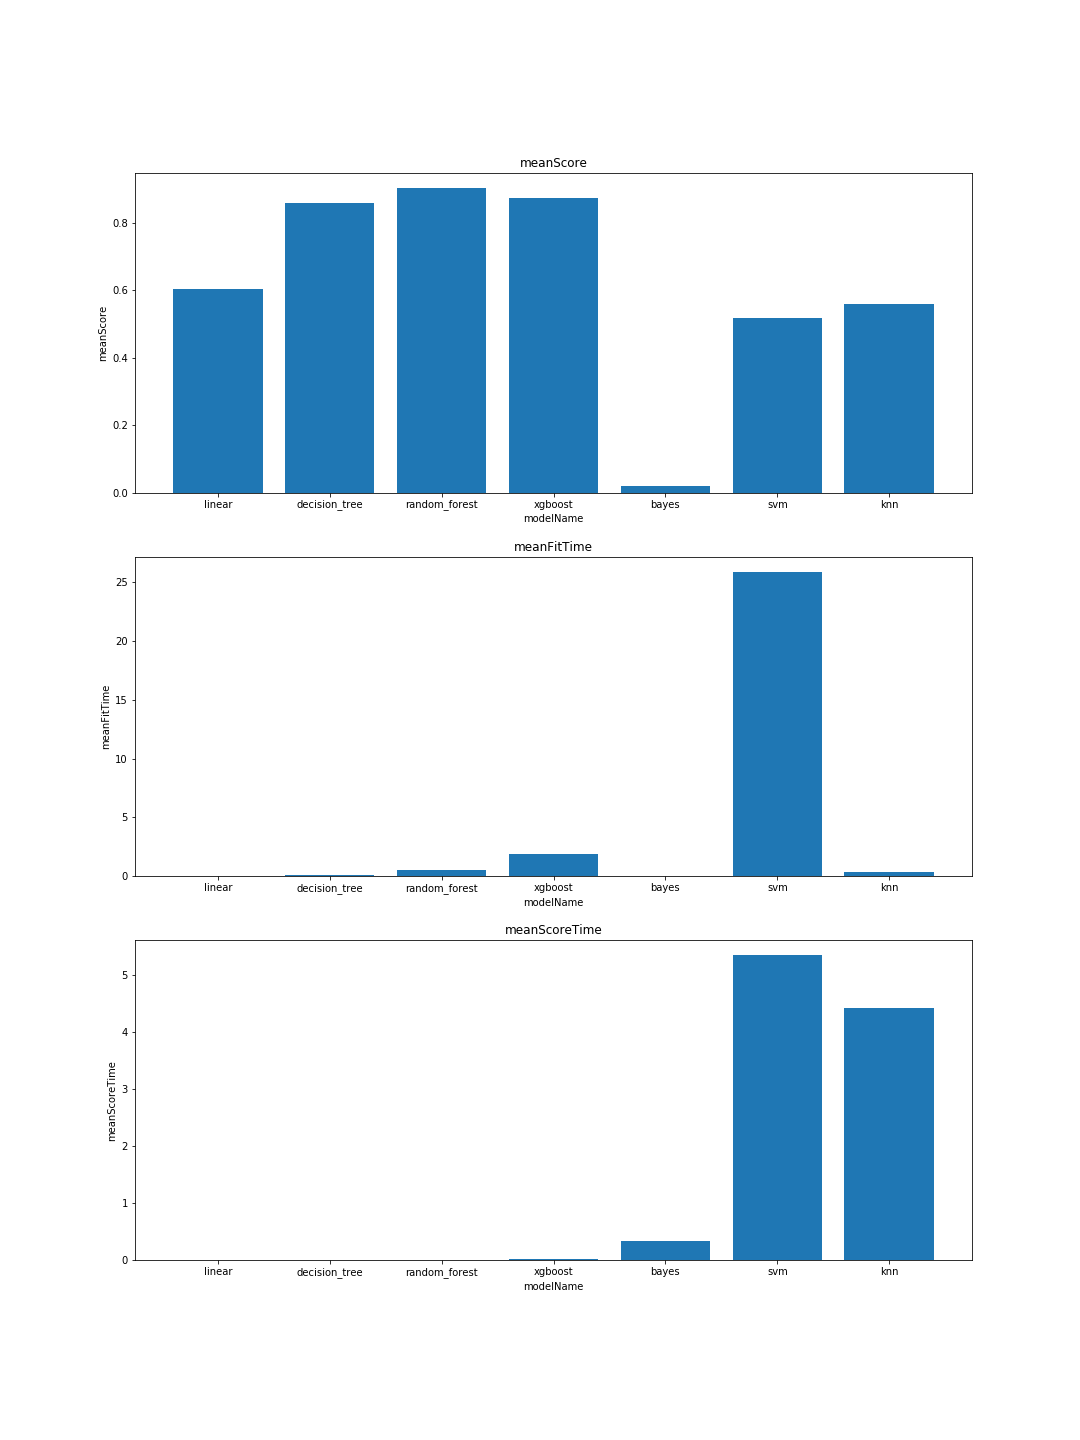

In [16]:
display(Image(filename='porownanie_modeli_R2_i_czas.png'))

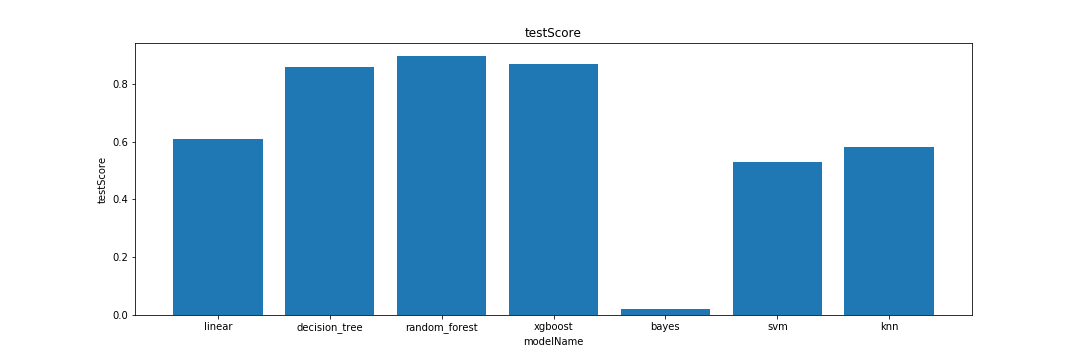

In [17]:
display(Image(filename='porownanie_modeli_test_score.png'))

### Tunning modeli
najlepsze wyniki wraz z ustawieniami hiperparametrów dla poszczególnych modeli + wykresy

### Najepszy model
- wbrany modl
- skuteczność modelu na danych testowych
- wnioski z naszych analiz modeli

In [5]:
xg = xgboost_model()

In [18]:
button_moj = widgets.Button(description='Pokaż wynik', button_style='danger')
button_moj.on_click(click_button_moj)
#button_moj.on_click(functools.partial(click_button_moj, xg)) <- to nie działa

In [19]:
formularz()
display(button_moj) # to liczy się wolno, bo za każdym razem trenuej model

Button(button_style='danger', description='Pokaż wynik', style=ButtonStyle())


Zip code: 98101, Month: January, Property type: Apartment, Room type: Private_room
accommodates: 1, bathrooms: 1, bedrooms: 1, beds: 1
cleaning_fees: False, guests_included: False, extra_people: False
Przewidywana cena: [215.8708]

Zip code: 98112, Month: January, Property type: Loft, Room type: Private_room
accommodates: 1, bathrooms: 1, bedrooms: 1, beds: 1
cleaning_fees: True, guests_included: False, extra_people: False
Przewidywana cena: [233.52959]


In [21]:
oblicz_cene(model=xg) # to liczby się szybko, bo korzysta z modelu wytrenowanego już w tym notatniku


Zip code: 98112, Month: January, Property type: Loft, Room type: Private_room
accommodates: 1, bathrooms: 1, bedrooms: 1, beds: 1
cleaning_fees: True, guests_included: False, extra_people: False
Przewidywana cena: [233.52959]
